## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import pandas as pd
import numpy as np

In [2]:
student_df = pd.read_csv("students-data.csv",delimiter=";")
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [3]:
student_df.index.name = 'number'

In [4]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# Check for missing value
student_df.isna().sum()
student_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [7]:
#Find unique value all attributes, and check that all values are within expected range.
for col in student_df.columns:
    print("Unique values of {}: {}".format(col,student_df[col].unique()))

Unique values of school: ['GP' 'MS']
Unique values of sex: ['F' 'M']
Unique values of age: [18 17 15 16 19 22 20 21]
Unique values of address: ['U' 'R']
Unique values of famsize: ['GT3' 'LE3']
Unique values of Pstatus: ['A' 'T']
Unique values of Medu: [4 1 3 2 0]
Unique values of Fedu: [4 1 2 3 0]
Unique values of Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Unique values of Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
Unique values of reason: ['course' 'other' 'home' 'reputation']
Unique values of guardian: ['mother' 'father' 'other']
Unique values of traveltime: [2 1 3 4]
Unique values of studytime: [2 3 1 4]
Unique values of failures: [0 3 2 1]
Unique values of schoolsup: ['yes' 'no']
Unique values of famsup: ['no' 'yes']
Unique values of paid: ['no' 'yes']
Unique values of activities: ['no' 'yes']
Unique values of nursery: ['yes' 'no']
Unique values of higher: ['yes' 'no']
Unique values of internet: ['no' 'yes']
Unique values of romantic: ['no' 'yes']
Unique v

### Above we can see that "failure" column has value 0, which is out of mentioned range. As mentioned here https://archive.ics.uci.edu/ml/datasets/Student+Performance 
## "failures" - number of past class failures (numeric: n if 1<=n<3, else 4). Hence 0 should be replaced by 4.

In [8]:
# Repleacing 0 by 4
print("Number or Zero: ",(student_df['failures'] == 0).sum())
student_df['failures'] = student_df['failures'].replace(0,4)
print("Number or Zero: ",(student_df['failures'] == 0).sum())

Number or Zero:  312
Number or Zero:  0


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [9]:
non_numerical_columns = student_df.select_dtypes(exclude='object').columns
print("Non numerical columns: ")
for col in student_df.select_dtypes(exclude='object').columns:
    print(col)

Non numerical columns: 
age
Medu
Fedu
traveltime
studytime
failures
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [10]:
student_num_df = student_df.select_dtypes(exclude='object')
print("Variance of each numerical independent variable: ")
student_num_df.var()

Variance of each numerical independent variable: 


age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       1.098310
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [11]:
# Drop independent variable whose varience is less than 1
for col in student_num_df.columns:
    if student_df[col].var() < 1:
        student_df.drop([col], axis=1, inplace=True)

In [12]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [14]:
for col in student_df.select_dtypes(include='object').columns:
    student_df[col] = labelencoder.fit_transform(student_df[col])

In [15]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [16]:
grades = ['G1', 'G2', 'G3']
for grade in grades:
    student_df[grade] = np.where(student_df[grade] >=10,1,0)

In [17]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [18]:
X = student_df.drop(['failures','G3'], axis=1) # failures is not good predictor, hence dropping failure.
Y = pd.DataFrame(student_df['G3'])

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'G3')

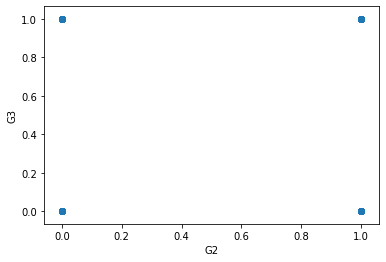

In [20]:
plt.scatter(x=X['G2'], y=Y['G3'])
plt.xlabel("G2")
plt.ylabel("G3")


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

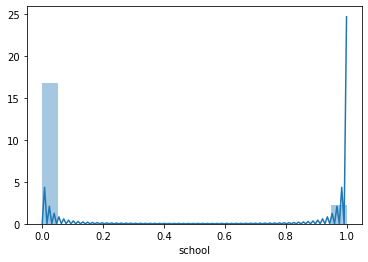

In [21]:
sns.distplot(X['school'])

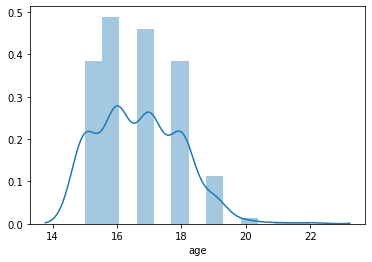

In [22]:
sns.distplot(X['age'])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

### Before splitting data in training and test set its good to check that dataset is imbalanced or not. For that we can use "value_counts()" or using sns.countplot()

1    265
0    130
Name: G3, dtype: int64


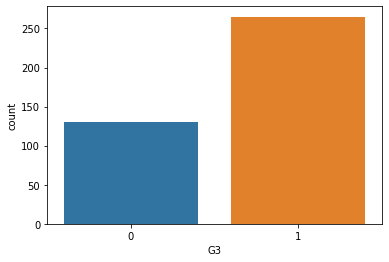

In [23]:
sns.countplot(student_df['G3'])
print(student_df.G3.value_counts())

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
test_size = 0.24
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=1)

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (300, 26)
X_test shape: (95, 26)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [27]:
logisticRegression = LogisticRegression()

In [28]:
logisticRegression.fit(X_train,y_train)
y_pred = logisticRegression.predict(X_test)
print("Training Score: {}".format(logisticRegression.score(X_test, y_test)))

Training Score: 0.9052631578947369


C:\Users\Chandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chandan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print("Test Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print("F1 Score: {}".format(metrics.f1_score(y_test, y_pred)))

Test Accuracy: 0.9052631578947369
F1 Score: 0.931297709923664


In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

    accuracy                           0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



# Naive bayes with Iris data

### Import Iris.csv

In [31]:
Iris_df = pd.read_csv("Iris.csv")

In [32]:
Iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [34]:
# Missing value
print(Iris_df.isnull().sum(axis=0))

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64


In [35]:
labelencoder_iris = LabelEncoder()
Iris_df['Class'] = labelencoder_iris.fit_transform(Iris_df['Class'])

In [36]:
Iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [37]:
X = Iris_df.drop('Class', axis=1)
Y = Iris_df['Class']

### Find the distribution of target variable (Class)

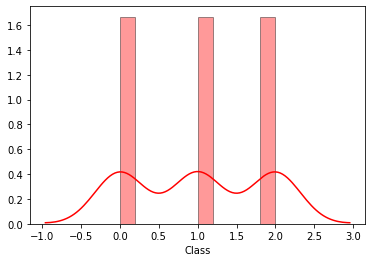

In [38]:
sns.distplot(Y, hist=True, kde=True, bins=10, color = 'red',hist_kws={'edgecolor':'black'})

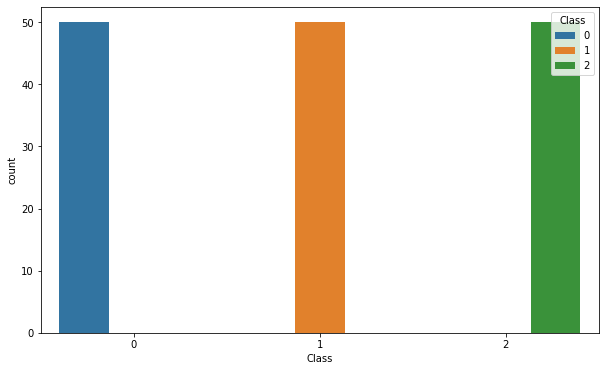

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(Y,hue=Y)

### Plot the distribution of target variable using histogram

Text(0, 0.5, 'Count')

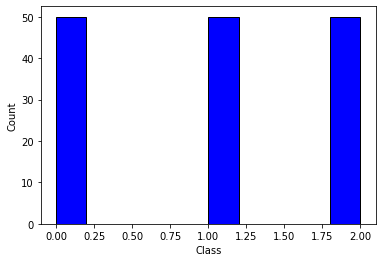

In [40]:
plt.hist(Y,bins=10,color = 'blue', edgecolor = 'black')
plt.xlabel('Class')
plt.ylabel('Count')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

In [41]:
X.columns

Index(['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)',
       'Petal width (in cm)'],
      dtype='object')

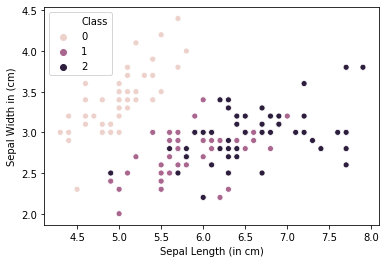

In [42]:
# Distribution of "Sepal Length" and "Sepal Width"
sns.scatterplot(X['Sepal Length (in cm)'], X['Sepal Width in (cm)'],hue=Y)

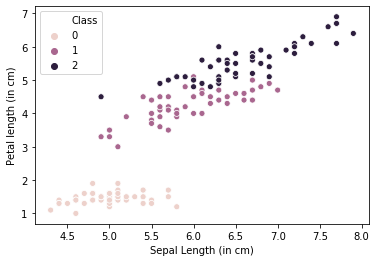

In [43]:
# Distribution of "Sepal Length" and "Petal length"
sns.scatterplot(X['Sepal Length (in cm)'], X['Petal length (in cm)'],hue=Y)

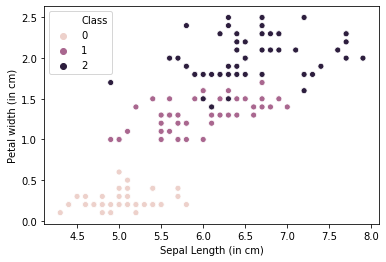

In [44]:
# Distribution of "Sepal Length" and "Petal width"
sns.scatterplot(X['Sepal Length (in cm)'], X['Petal width (in cm)'],hue=Y)

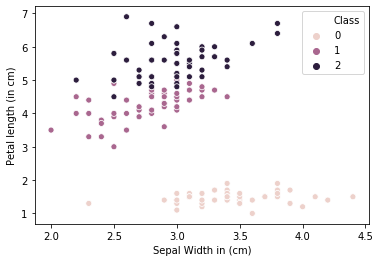

In [45]:
# Distribution of "Sepal Width" and "Petal length"
sns.scatterplot(X['Sepal Width in (cm)'], X['Petal length (in cm)'],hue=Y)

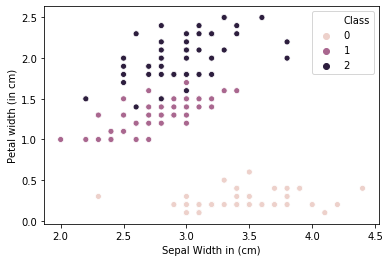

In [46]:
# Distribution of "Sepal Width" and "Petal width"
sns.scatterplot(X['Sepal Width in (cm)'], X['Petal width (in cm)'],hue=Y)

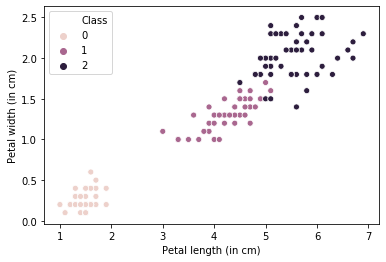

In [47]:
# Distribution of "Petal length" and "Petal width"
sns.scatterplot(X['Petal length (in cm)'], X['Petal width (in cm)'],hue=Y)

### Summary Statistics and explain insights for at least 2 variables

In [48]:
Iris_df.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

In [49]:
Iris_df.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Correlation among all variables and give your insights

In [50]:
Iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


### Split data in Training and Validation in 80:20

In [51]:
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=1)

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (120, 4)
X_test shape: (30, 4)


### Do Feature Scaling

In [52]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

### Train and Fit NaiveBayes Model

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
NB_model = GaussianNB()
NB_model.fit(X_train_scaled, y_train)
y_pred_nb = NB_model.predict(X_test_scaled)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [55]:
print("Test Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_nb)))

Test Accuracy: 0.9


In [56]:
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



In [58]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred_nb))

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]
